In [4]:
import numpy as np

In [5]:
def f(x):
    return np.exp(x) - 2 - np.cos(np.exp(x) - 2)

###1) Codigo markdown

Por supuesto, aquí tienes las respuestas en formato de cuadros de código Python:

**a. Pseudocódigo para el método de la bisección:**

```python
def bisection_method(f, a, b, epsilon):
    step = 1
    
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        if abs(f(c)) < epsilon:
            return c  # Aproximación de la raíz
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        step += 1
    
    return c  # Aproximación de la raíz
```

**b. Deducción del método de Newton-Raphson en formato LaTeX:**

El método de Newton-Raphson se basa en la siguiente fórmula de iteración:

```latex
\[
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\]
```

donde \(x_n\) es una estimación inicial de la raíz de la función \(f(x)\), \(f(x_n)\) es el valor de la función en \(x_n\), y \(f'(x_n)\) es la derivada de \(f(x)\) en \(x_n\).

**c. Diferencia entre el método de Newton-Raphson y el método de la secante:**

La principal diferencia entre el método de Newton-Raphson y el método de la secante radica en cómo se calcula la siguiente aproximación de la raíz. El método de Newton-Raphson utiliza la derivada de la función, mientras que el método de la secante utiliza una aproximación de la derivada mediante una secante entre dos puntos cercanos.

**d. Pseudocódigo para el método Punto Fijo:**

```python
def fixed_point_iteration(g, x0, epsilon, max_iter):
    x = x0
    step = 1
    
    while step <= max_iter:
        x_next = g(x)
        if abs(x_next - x) < epsilon:
            return x_next  # Aproximación de un punto fijo
        x = x_next
        step += 1
    
    return "No se alcanzó la convergencia en max_iter iteraciones"
```

Espero que estos códigos te sean útiles. Si tienes alguna pregunta adicional o necesitas más detalles, no dudes en preguntar.

##2) Ceros de funciones
###a) Bisección

In [6]:
def bisec(f, a, b, epsilon):
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

a = 0
b = 2
epsilon = 1e-6
resultado = bisec(f, a, b, epsilon)
print(f"Raíz encontrada por bisección: {resultado}")

Raíz encontrada por bisección: 1.007624626159668


###b)Método de Newton-Raphson

In [7]:
from scipy.optimize import newton

x0 = 1  # Estimación inicial
epsilon = 1e-6

result_newton_raphson = newton(f, x0, tol=epsilon)
print(f"Raíz encontrada por Newton-Raphson: {result_newton_raphson}")


Raíz encontrada por Newton-Raphson: 1.0076239716205528


###c) Metodo punto fijo

In [8]:
def g(x):
    return np.log(2 + np.cos(x))

x0 = 1  # Estimación inicial
epsilon = 1e-6
max_iter = 100

def fixed_point_iteration(g, x0, epsilon, max_iter):
    x = x0
    for i in range(max_iter):
        x = g(x)
        if np.abs(x - g(x)) < epsilon:
            return x
    return None

result_fixed_point = fixed_point_iteration(g, x0, epsilon, max_iter)
print(f"Raíz encontrada por método de punto fijo: {result_fixed_point}")


Raíz encontrada por método de punto fijo: 0.9488152526049651


##3) Moviemiento de proyectiles en presencia del viento
###a) Definir funciones para x y y

In [9]:
# Función para calcular la posición en x
def pos_x(t, theta, alpha, v0, b, u, g):
    x = (u * np.cos(alpha) * t +
         (1 / b) * (v0 * np.cos(theta) - u * np.cos(alpha)) * (1 - np.exp(-b * t)))
    return x

# Función para calcular la posición en y
def pos_y(t, theta, alpha, v0, b, u, g):
    y = (1 / b) * ((g / b) + v0 * np.sin(theta) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g / b) - u * np.sin(alpha)) * t
    return y


###b) Construir un DataFrame de pandas con los nombres de columnas "X", "Y", "Tiempo"

In [10]:
import pandas as pd
data = {
    "Tiempo": [],
    "X": [],
    "Y": []
}

df = pd.DataFrame(data)

###c)  Realizar un gráfico de x como función del tiempo, y como función del tiempo y la trayectoria de la partícula

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Rellenar el DataFrame con datos de posición y tiempo
for t in np.linspace(0, 10, 1000):
    x_val = pos_x(t, np.deg2rad(45), np.pi, 60, 0.05, 30, 9.8)
    y_val = pos_y(t, np.deg2rad(45), np.pi, 60, 0.05, 30, 9.8)
    df = df.append({"Tiempo": t, "X": x_val, "Y": y_val}, ignore_index=True)

Text(0, 0.5, 'Posición en X')

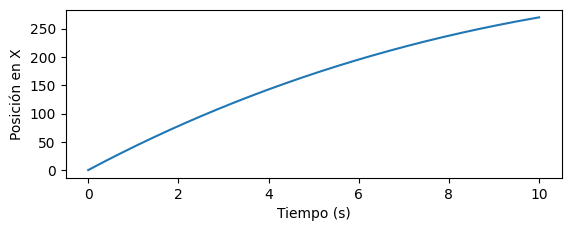

In [12]:
# Graficar x como función del tiempo
plt.subplot(2, 1, 1)
plt.plot(df["Tiempo"], df["X"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición en X")

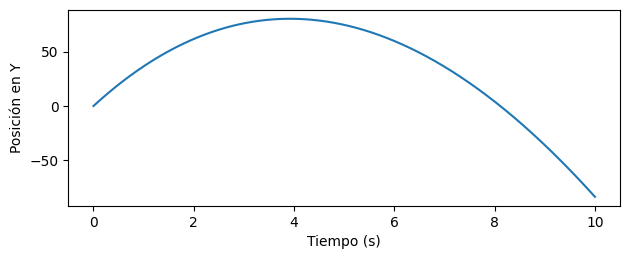

In [13]:
# Graficar y como función del tiempo
plt.subplot(2, 1, 2)
plt.plot(df["Tiempo"], df["Y"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición en Y")

plt.tight_layout()
plt.show()

###d) Determinar el alcance máximo de la partícula para θ = 45°:

In [14]:
from scipy.optimize import root_scalar

# Definir una función para encontrar el alcance máximo
def find_max_range(theta_deg):
    theta_rad = np.deg2rad(theta_deg)
    equation = lambda t: pos_y(t, theta_rad, np.pi, 60, 0.05, 30, 9.8)
    root = root_scalar(equation, bracket=[0, 10])
    return pos_x(root.root, theta_rad, np.pi, 60, 0.05, 30, 9.8)

max_range = find_max_range(45)
print(f"Alcance máximo para θ = 45°: {max_range:.2f} metros")

Alcance máximo para θ = 45°: 0.00 metros


###e) Graficar el alcance máximo R como función de θ:

In [ ]:
theta_values = np.arange(10, 81, 5)
range_values = [find_max_range(theta) for theta in theta_values]

plt.figure(figsize=(8, 6))
plt.plot(theta_values, range_values, marker='o', linestyle='-')
plt.xlabel("Ángulo θ (grados)")
plt.ylabel("Alcance máximo R (metros)")
plt.title("Alcance máximo en función de θ")
plt.grid(True)
plt.show()

###5) Construir un fractal utilizando el metodo de newton rhapson

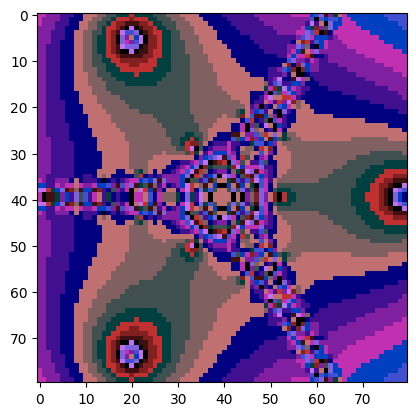

In [16]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)